# Moses dataset exploratory analysis

The dataset can be found on github at https://github.com/molecularsets/moses.

In [2]:
import boto3
local_moses_path = './moses.csv'
s3 = boto3.client('s3')
s3.download_file('sars-cov-2-25309b4013524', 'moses.csv', local_moses_path)

In [3]:
import pandas as pd
dataset = pd.read_csv(local_moses_path)
dataset

,SMILES,SPLIT
0,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1,train
1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train
2,CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1,test
3,Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO,train
4,Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C,train
...,...,...
1936957,N#Cc1c(Br)cnc(N)c1Br,train
1936958,COC(=O)c1cc(CNC(=O)OC(C)(C)C)ccc1C,train
1936959,NC(=O)c1ccc2ccccc2c1Br,train
1936960,CC(=O)Nc1cccc(-c2nc3cc(C)ccc3[nH]c2=O)c1,train


In [4]:
smile_lengths = dataset.SMILES.map(lambda x: len(x))
dataset.insert(2, "SMILESLength", smile_lengths, True)
dataset

,SMILES,SPLIT,SMILESLength
0,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1,train,38
1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train,36
2,CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1,test,38
3,Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO,train,35
4,Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C,train,32
...,...,...,...
1936957,N#Cc1c(Br)cnc(N)c1Br,train,20
1936958,COC(=O)c1cc(CNC(=O)OC(C)(C)C)ccc1C,train,34
1936959,NC(=O)c1ccc2ccccc2c1Br,train,22
1936960,CC(=O)Nc1cccc(-c2nc3cc(C)ccc3[nH]c2=O)c1,train,40


In [20]:
longest_smile = smile_lengths.max()
longest_smile

57

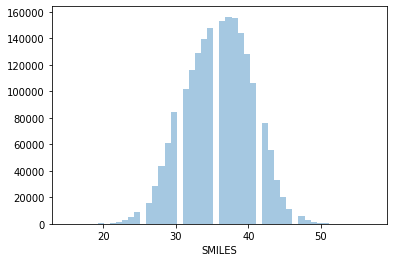

In [5]:
import seaborn as sns

sns.distplot(smile_lengths, kde=False)